Twitter Data Analysis

-Connecting to twitter.com using a user authentication and its api.
-we can search tweets and get sentiment on about any topic using wide variety of methods.

In [1]:
#defining function to get daily tweets

def FunctionToGetDailyTweets():
    #import libraries 
    
    import tweepy
    import matplotlib.pyplot as plt
    # To manipulate the twitter imported data
    import pandas as pd
    import json
    from datetime import timedelta, date
    
    start_date = date(2020, 10, 17)
    end_date = date(2020, 10, 26)
    Final_data = pd.DataFrame()
    
    #Defining Daterange function
    def daterange(start_date, end_date):
        for n in range(int((end_date - start_date).days)):
            yield start_date + timedelta(n)

    #loop for getting tweets of each day
    for single_date in daterange(start_date, end_date):
        date=(single_date.strftime("%Y-%m-%d"))

        #Assignning keys 
        access_token = "3330087118-dnkNytgjujqLJg0RIlyHKgiZoix8DpEIV1iKXhW"
        access_token_secret = "BTgKB6tvJ6xescB4J5OhC4OU2n0AnVAEf2CRZcirZ8zuo"
        consumer_key = "hcuRfSV4aWjp9AjHazSat2HcS"
        consumer_secret = "vLIArJmqrMWizqHcErInNjDECfjthkErErAE0nWIDRKBSmkJUE"

        # Connecting to twitter using user credentials
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_token_secret)
        api = tweepy.API(auth)

        # Searching about any keyword in all the latest tweets
        tweets_data=api.search('Samsung M51',count=100, lang='en', include_rts=False, tweet_mode="extended",
                               since=start_date,until=date)
        
        print(date)
        print ("number of tweets found: "+ str(len(tweets_data)))

        # Creating an empty data frame to store the tweets
        tweets_China = pd.DataFrame()
        for status in tweets_data:
            tweets_China=tweets_China.append(status._json,ignore_index=True)
        Final_data=Final_data.append(tweets_China)
    return Final_data

In [2]:
#Calling the function
tweets_China=FunctionToGetDailyTweets()

2020-10-17
number of tweets found: 0
2020-10-18
number of tweets found: 12
2020-10-19
number of tweets found: 100
2020-10-20
number of tweets found: 100
2020-10-21
number of tweets found: 63
2020-10-22
number of tweets found: 100
2020-10-23
number of tweets found: 100
2020-10-24
number of tweets found: 100
2020-10-25
number of tweets found: 100


In [3]:
#Finding the Dimension of the data 
tweets_China.shape

(675, 31)

In [4]:
# Looking at the data collected
tweets_China.head()

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,...,retweeted,source,truncated,user,extended_entities,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweeted_status
0,None,None,Sat Oct 17 23:08:59 +0000 2020,"[29, 252]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,@MartianEarthie @geekyranjit My preference is ...,None,1.317604e+18,...,0.0,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1038804647966720001, 'id_str': '1038804...",NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,Sat Oct 17 22:06:56 +0000 2020,"[0, 209]","{'hashtags': [{'text': 'electronics', 'indices...",0.0,0.0,"Samsung Galaxy M51 (Electric Blue, 6GB R\n 🔹 O...",None,1.317588e+18,...,0.0,,0.0,"{'id': 1297213254758850562, 'id_str': '1297213...","{'media': [{'id': 1317587928504295433, 'id_str...",0.0,NaN,NaN,NaN,NaN
2,None,None,Sat Oct 17 20:20:27 +0000 2020,"[0, 278]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,@SamsungMobile @SamsungIndia I have purchased...,None,1.317561e+18,...,0.0,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1317177909044334595, 'id_str': '1317177...",NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,Sat Oct 17 20:03:30 +0000 2020,"[13, 49]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,@wild_sonica OnePlus Nord or Samsung M41 or M51..,None,1.317557e+18,...,0.0,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 80817769, 'id_str': '80817769', 'name':...",NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,Sat Oct 17 20:01:58 +0000 2020,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...",2.0,0.0,Ordered Samsung M51 atlast. A New phone almost...,None,1.317556e+18,...,0.0,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 414667298, 'id_str': '414667298', 'name...",NaN,0.0,{'created_at': 'Fri Oct 16 09:33:54 +0000 2020...,1.317036e+18,1317036035755237377,NaN


In [5]:
# Looking at only the tweet texts
tweets_China['full_text'].head(10)

0    @MartianEarthie @geekyranjit My preference is ...
1    Samsung Galaxy M51 (Electric Blue, 6GB R\n 🔹 O...
2    @SamsungMobile  @SamsungIndia I have purchased...
3    @wild_sonica OnePlus Nord or Samsung M41 or M51..
4    Ordered Samsung M51 atlast. A New phone almost...
5    @AmreliaRuhez I like the Samsung battery on th...
6    RT @sharmagkreviews: Samsung Galaxy M51 Unboxi...
7    #Samsung presenting #GalaxyM51 with huge 7000m...
8    @DharmendraM18 @LGIndia @BikashKumarNai7 now i...
9    @RishJ01 @vikalpchaubey @IFENetwork24 @TheWolf...
Name: full_text, dtype: object

#Sentiment analysis

Using bag of words model, finding the sentiment of every tweet found

In [6]:
# Reading positive and negative words list
import pandas as pd
PositiveWords=pd.read_table('D:\\DS\\Python\\Worcloud assignment\\Positive_words\\positive-words.txt', encoding='latin')
NegativeWords=pd.read_table('D:\\DS\\Python\\Worcloud assignment\\Negative_words\\negative-words.txt', encoding='latin')

In [7]:
# Defining a function to take a sentence as input and provide a sentiment fo it.
def ComputeSentimentScore(inputSentence):
    import re
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    # converting every word in lowercase
    newSentence=inputSentence.lower()
    
    # Removing everything which is not alphabets
    WordList= re.sub(r'[^a-z A-Z]',r'',newSentence)
    
    # Splitting the sentence into list of words
    WordList=WordList.split()
    
    # Iterate every word and check if it is present in the positive or negative word list
    for newWord in WordList:
        #print(newWord)
        if (newWord in NegativeWords.values):
            NegativeScore+=1
        if (newWord in PositiveWords.values):
            PositiveScore+=1
    
    
    if((PositiveScore-NegativeScore) > 0):
        OverallSentiment='Positive'
    else:
        OverallSentiment='Negative'
    return(OverallSentiment)
    

In [8]:
# Calling sentiment score function for every tweet
tweets_China['Sentiment']=tweets_China['full_text'].apply(ComputeSentimentScore)

# Printing sample rows to understand
tweets_China[['full_text', 'Sentiment']].head()

,full_text,Sentiment
0,@MartianEarthie @geekyranjit My preference is ...,Positive
1,"Samsung Galaxy M51 (Electric Blue, 6GB R\n 🔹 O...",Negative
2,@SamsungMobile @SamsungIndia I have purchased...,Negative
3,@wild_sonica OnePlus Nord or Samsung M41 or M51..,Negative
4,Ordered Samsung M51 atlast. A New phone almost...,Negative


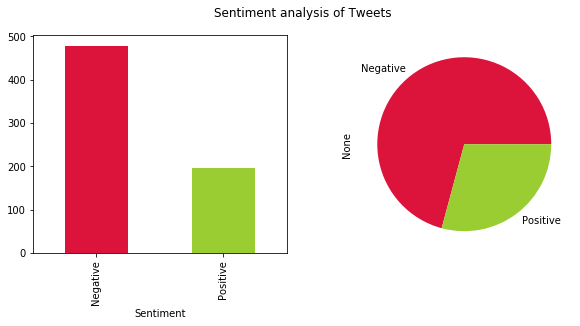

In [9]:
# Visualizing the overall sentiment distribution
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Tweets")

# Grouping the data
GroupedData=tweets_China.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'yellowgreen'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson','yellowgreen'])

In [10]:
#Exploring the sentiment analysis count.
GroupedData=tweets_China.groupby('Sentiment').size()
GroupedData

Sentiment
Negative    478
Positive    197
dtype: int64

In [11]:
#creating user defined date function to change the date format.
import datetime
def CreateDate(InpString):
    return(datetime.datetime.strptime(InpString, '%a %b %d %H:%M:%S +0000 %Y').date())
    
tweets_China['created_at']=tweets_China['created_at'].apply(CreateDate)
tweets_China.head()

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,...,source,truncated,user,extended_entities,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweeted_status,Sentiment
0,None,None,2020-10-17,"[29, 252]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,@MartianEarthie @geekyranjit My preference is ...,None,1.317604e+18,...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1038804647966720001, 'id_str': '1038804...",NaN,NaN,NaN,NaN,NaN,NaN,Positive
1,None,None,2020-10-17,"[0, 209]","{'hashtags': [{'text': 'electronics', 'indices...",0.0,0.0,"Samsung Galaxy M51 (Electric Blue, 6GB R\n 🔹 O...",None,1.317588e+18,...,,0.0,"{'id': 1297213254758850562, 'id_str': '1297213...","{'media': [{'id': 1317587928504295433, 'id_str...",0.0,NaN,NaN,NaN,NaN,Negative
2,None,None,2020-10-17,"[0, 278]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,@SamsungMobile @SamsungIndia I have purchased...,None,1.317561e+18,...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1317177909044334595, 'id_str': '1317177...",NaN,NaN,NaN,NaN,NaN,NaN,Negative
3,None,None,2020-10-17,"[13, 49]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,@wild_sonica OnePlus Nord or Samsung M41 or M51..,None,1.317557e+18,...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 80817769, 'id_str': '80817769', 'name':...",NaN,NaN,NaN,NaN,NaN,NaN,Negative
4,None,None,2020-10-17,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...",2.0,0.0,Ordered Samsung M51 atlast. A New phone almost...,None,1.317556e+18,...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 414667298, 'id_str': '414667298', 'name...",NaN,0.0,{'created_at': 'Fri Oct 16 09:33:54 +0000 2020...,1.317036e+18,1317036035755237377,NaN,Negative


In [12]:
CrossTabResult=pd.crosstab(index=tweets_China['created_at'], columns=tweets_China['Sentiment'])
CrossTabResult

Sentiment,Negative,Positive
created_at,,
2020-10-17,8,4
2020-10-18,60,40
2020-10-19,71,29
2020-10-20,56,7
2020-10-21,76,24
2020-10-22,85,27
2020-10-23,57,31
2020-10-24,65,35


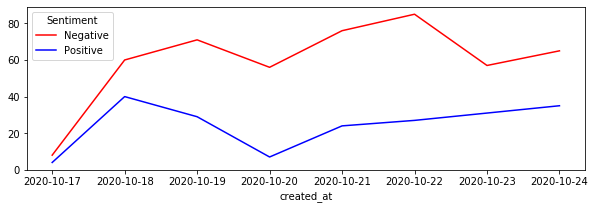

In [13]:
CrossTabResult.plot.line(figsize=(10,3), color=['red','blue'])

Wordcloud analysis

In [14]:
# Extracting only the Tweet text
Tweet_Texts=tweets_China['full_text'].values

# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

In [15]:
# Observing the tweets text for junk
print(Tweets_String)

["@MartianEarthie @geekyranjit My preference is M51. Samsung has a great UI which is very simple yet very feature rich. ONE UI has it's ease of use. Will be perfect for your mom. Samsung also offers better cameras.\nMy dad is using a M31s and he loves it."
 'Samsung Galaxy M51 (Electric Blue, 6GB R\n 🔹 Offer price-₹\xa022,499.00\n 🔹 MRP-₹\xa028,999.00\n 🔹 You Save: ₹ 6,500.00 (22%)\n ✨ Reviews-4.3 out of 5 stars\n ✨ Category- #electronics\n\nhttps://t.co/FHbOnba9B4 #deal #loot https://t.co/CxyB2Chv5h'
 '@SamsungMobile  @SamsungIndia I have purchased Samsung Galaxy M51 on September 18 from @amazonIN, the very same day of exclusive @amazonIN launch. Within 15 days of purchase, I started noticing display and touch problem which was unexpected from a reputed company like @Samsung.'
 '@wild_sonica OnePlus Nord or Samsung M41 or M51..'
 'Ordered Samsung M51 atlast. A New phone almost after 5 yrs!! Its arriving today 😍 https://t.co/NCEy7yNrH0'
 '@AmreliaRuhez I like the Samsung battery on the

In [16]:
# Tweet Text cleaning
import re
# Deleting everything which is not characters
Tweet_Texts_Cleaned=re.sub(r'[^a-z A-Z]',r' ', Tweets_String)
# Converting the whole text to lowercase
Tweet_Texts_Cleaned=Tweet_Texts_Cleaned.lower()
# Deleting any word which is less than 4-characters mostly those are stopwords
Tweet_Texts_Cleaned=re.sub(r'\b\w{1,3}\b', ' ', Tweet_Texts_Cleaned)
# Stripping extra spaces in the text
Tweet_Texts_Cleaned=re.sub(r' +',' ',Tweet_Texts_Cleaned)
Tweet_Texts_Cleaned

' martianearthie geekyranjit preference samsung great which very simple very feature rich ease will perfect your samsung also offers better cameras using loves samsung galaxy electric blue offer price save reviews stars category electronics nhttps fhbonba deal loot https cxyb samsungmobile samsungindia have purchased samsung galaxy september from amazonin very same exclusive amazonin launch within days purchase started noticing display touch problem which unexpected from reputed company like samsung wild sonica oneplus nord samsung ordered samsung atlast phone almost after arriving today https ncey ynrh amreliaruhez like samsung battery samsung also display superb amreliaruhez amazonin agifspecialssamsung https bbex sharmagkreviews samsung galaxy unboxing retail unit honest opinions giveaway https ojeirujvns youtube samsu samsung presenting galaxym with huge battery nhttps dicbxrmohv nwith features type fast charger promise charge battery minutes samsungevent galaxymseries galaxym pric

In [17]:
#finding the frequency of the words

import pandas as pd

#splitting the text to make list of words
Wordlist=Tweet_Texts_Cleaned.split()
#creating DataFrame
WordData=pd.DataFrame(data=pd.Series(Wordlist), columns=['words'])
#Top Frequenmcy
WordData.groupby('words').size().nlargest(10)

words
samsung                      711
amazonin                     661
galaxy                       582
https                        372
amazongreatindianfestival    195
behind                       169
with                         164
screenshot                   129
door                         108
nsamsung                      98
dtype: int64

Generating the wordcloud

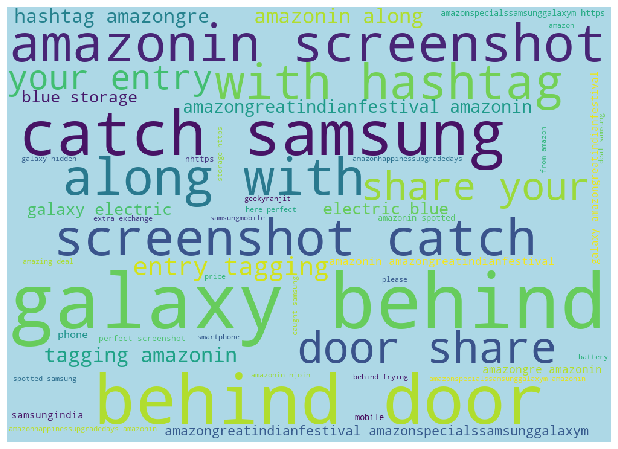

In [18]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['samsung','galaxy','amazonin','https','nsamsung','with']

wordcloudimage = WordCloud(
                          max_words=50,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='lightBlue',
                          width=1000,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()